In [1]:
import pandas as pd


import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

In [2]:
path = '/home/hassan/lily/MLA/FDA/inpatient_admission_withtarget.csv'
inpatient = pd.read_csv(path).iloc[:,1:]
inpatient_cardi = inpatient[inpatient['Cardiovascular'] == 1].drop(columns = ['Cardiovascular','First listed discharge diagnosis icd10 subcategory','Second listed discharge diagnosis icd10 subcategory'])
inpatient_cardi.head()

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State,Readmission
5,100020,54.555173,2016-03-27 21:58:50.0,2016-03-27 23:41:21.0,NON-COUNT,NON-COUNT,PSYCH RESID REHAB TRMT PROG,ED OBSERVATION,Regular,0,1,NaN,0.0,Pennsylvania,1
6,100029,87.512004,2012-10-02 15:17:51.0,2012-10-09 10:35:23.0,SURGERY,MEDICINE,GASTROENTEROLOGY,TELEMETRY,Regular,0,1,NaN,0.0,Florida,1
7,10003,54.703168,2002-04-25 00:11:38.0,2002-06-11 01:08:19.0,MEDICINE,MEDICINE,INTERMEDIATE MEDICINE,GENERAL(ACUTE MEDICINE),Regular,0,1,NaN,NaN,Texas,1
8,10003,55.271575,2002-11-18 18:15:13.0,2002-11-26 21:17:51.0,SURGERY,SURGERY,NH SHORT STAY REHABILITATION,PERIPHERAL VASCULAR,Regular,0,1,NaN,NaN,Texas,1
9,10003,60.837758,2008-06-14 04:48:50.0,2008-06-25 18:44:59.0,MEDICINE,MEDICINE,"STAR I, II & III",Not specified (no value),Regular,0,1,NaN,1.0,Texas,1


In [30]:
'''
path = '/home/bhatti/dataset/VCHAMPS/medications_ordered_train.csv'
medications_ordered = pd.read_csv(path).iloc[:,1:]
medications_ordered.head()
'''

"\npath = '/home/bhatti/dataset/VCHAMPS/medications_ordered_train.csv'\nmedications_ordered = pd.read_csv(path).iloc[:,1:]\nmedications_ordered.head()\n"

In [31]:
'''
pid = set.intersection(set(inpatient_cardi['Internalpatientid'].unique()),
                       set(medications_ordered['Internalpatientid'].unique()))

inpatient = inpatient_cardi[inpatient_cardi['Internalpatientid'].isin(pid)].reset_index(drop = True)
medications = medications_ordered[medications_ordered['Internalpatientid'].isin(pid)].reset_index(drop = True)
'''

"\npid = set.intersection(set(inpatient_cardi['Internalpatientid'].unique()),\n                       set(medications_ordered['Internalpatientid'].unique()))\n\ninpatient = inpatient_cardi[inpatient_cardi['Internalpatientid'].isin(pid)].reset_index(drop = True)\nmedications = medications_ordered[medications_ordered['Internalpatientid'].isin(pid)].reset_index(drop = True)\n"

In [8]:
#medications.to_csv('/home/daisy/FDA_Dataset/medications_ordered_cardi.csv')

In [3]:
path = '/home/daisy/FDA_Dataset/medications_ordered_cardi.csv'
medications = pd.read_csv(path).iloc[:,1:]
medications.head()

,Internalpatientid,Age at med ordered,Order date,Medication start date,Medication stop date,Order discontinue date,Ordered medication atc 5,Order status,Stop reason,State
0,1000,83.372701,2002-11-26 17:20:15.0,2002-11-26 17:12:15.0,2002-12-01 15:06:15.0,2002-12-01 15:06:15.0,glyceryl trinitrate,discontinued,Not specified (no value),Florida
1,1000,83.372701,2002-11-26 17:20:15.0,2002-11-26 17:12:15.0,2002-12-01 15:06:15.0,2002-12-01 15:06:15.0,lidocaine,discontinued,Not specified (no value),Florida
2,1000,83.372701,2002-11-26 17:20:15.0,2002-11-26 17:12:15.0,2002-12-01 15:05:15.0,2002-12-01 15:05:15.0,dopamine,discontinued,Not specified (no value),Florida
3,1000,83.372701,2002-11-26 17:20:15.0,2002-11-26 17:12:15.0,2002-12-01 15:04:15.0,2002-12-01 15:04:15.0,dobutamine,discontinued,Not specified (no value),Florida
4,1000,83.374655,2002-11-27 10:28:12.0,2002-11-27 08:04:12.0,2002-11-28 13:30:12.0,2002-11-28 13:30:12.0,enoxaparin,discontinued,Not specified (no value),Florida


In [4]:
medications[medications.duplicated(['Internalpatientid','Order date', 'Ordered medication atc 5'],keep = False)]

,Internalpatientid,Age at med ordered,Order date,Medication start date,Medication stop date,Order discontinue date,Ordered medication atc 5,Order status,Stop reason,State
59,100005,67.556666,2003-11-03 23:04:21.0,2003-11-04 02:19:21.0,2003-11-07 02:17:21.0,NaN,methylprednisolone,complete,Not specified (no value),Oklahoma
60,100005,67.556666,2003-11-03 23:04:21.0,2003-11-03 23:06:21.0,2003-11-07 02:17:21.0,2003-11-07 02:17:21.0,methylprednisolone,discontinued/edit,Not specified (no value),Oklahoma
61,100005,67.556666,2003-11-03 23:04:21.0,2003-11-03 23:06:21.0,2003-11-04 09:43:21.0,NaN,methylprednisolone,expired,Not specified (no value),Oklahoma
79,100008,69.130789,2018-04-27 07:16:45.0,2018-04-29 04:28:45.0,2018-04-30 10:52:45.0,2018-04-30 10:52:45.0,warfarin,discontinued,Not specified (no value),North Carolina
80,100008,69.130789,2018-04-27 07:16:45.0,2018-04-28 04:28:45.0,2018-04-30 10:52:45.0,NaN,warfarin,discontinued,Not specified (no value),North Carolina
...,...,...,...,...,...,...,...,...,...,...
34872305,99999,92.396610,2009-04-22 23:03:32.0,2009-04-22 23:14:32.0,2009-04-23 01:31:32.0,NaN,captopril,expired,Not specified (no value),California
34872306,99999,92.396610,2009-04-22 23:03:32.0,2009-04-22 23:14:32.0,2009-04-23 23:17:32.0,2009-04-23 23:17:32.0,captopril,discontinued,Not specified (no value),California
34872316,99999,94.314410,2011-03-24 22:00:29.0,2011-03-24 22:00:29.0,2011-03-24 23:36:29.0,NaN,metolazone,expired,Not specified (no value),California
34872317,99999,94.314410,2011-03-24 22:00:29.0,2011-03-25 12:43:29.0,2011-03-25 12:42:29.0,NaN,metolazone,complete,Not specified (no value),California


In [5]:
medications = medications.drop_duplicates(subset = ['Internalpatientid','Order date', 'Ordered medication atc 5'],keep = 'first')

In [6]:
medications[medications.duplicated(['Internalpatientid','Order date', 'Ordered medication atc 5'],keep = False)]

,Internalpatientid,Age at med ordered,Order date,Medication start date,Medication stop date,Order discontinue date,Ordered medication atc 5,Order status,Stop reason,State


From Ordered medication atc 5.unique(), extract medicines that may highly related to cardiovascular

In [7]:
cardi_med = ['glyceryl trinitrate', 'lidocaine', 'dopamine', 'dobutamine',
             'enoxaparin', 'digoxin','spironolactone','amlodipine',
             'clopidogrel', 'atorvastatin', 'metoprolol','lisinopril',
             'warfarin', 'carvedilol']

In [8]:
# if the patient use a cardiovascular relate medicine, count = 1
medications['medication_cnt'] = medications['Ordered medication atc 5'].apply(lambda x: 1 if x in cardi_med else 0)

# total number of cardiovascular relate medicine a patient takes
medications['num_medication'] = medications['medication_cnt'].groupby(medications['Internalpatientid']).transform('sum')

In [9]:
test = medications.copy()
test['Order date'] = pd.to_datetime(test['Order date'])
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32273380 entries, 0 to 34872330
Data columns (total 12 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Internalpatientid         int64         
 1   Age at med ordered        float64       
 2   Order date                datetime64[ns]
 3   Medication start date     object        
 4   Medication stop date      object        
 5   Order discontinue date    object        
 6   Ordered medication atc 5  object        
 7   Order status              object        
 8   Stop reason               object        
 9   State                     object        
 10  medication_cnt            int64         
 11  num_medication            int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 3.1+ GB


In [10]:
# sort by order date, since order date has no missing values
#start date(1250566) and stop date(570867) have too many missing values

# Calculate the total order time length for each patient every year(365 days)
# No missing value in order_diff
order_min = test['Order date'].groupby(test['Internalpatientid'],group_keys= False).min()
order_max = test['Order date'].groupby(test['Internalpatientid'],group_keys= False).max()
data = (order_max - order_min).apply(lambda x: round(pd.Timedelta(x).days / 30,2))#apply(lambda x: round(pd.Timedelta(x).days / 365,2))
order_diff = pd.DataFrame(data).reset_index(drop = False)
order_diff =  order_diff.rename(columns={'Order date':'Order time diff'})
order_diff

,Internalpatientid,Order time diff
0,2,259.17
1,3,51.07
2,4,173.23
3,5,71.80
4,13,71.97
...,...,...
50044,169051,96.37
50045,169053,88.07
50046,169055,134.90
50047,169057,260.60


In [13]:
order_diff.describe()

,Internalpatientid,Order time diff
count,50049.000000,50049.000000
mean,84471.413455,147.096214
std,48903.718081,80.842366
min,2.000000,0.000000
25%,41835.000000,79.330000
50%,84644.000000,147.200000
75%,126812.000000,216.670000
max,169060.000000,287.570000


In [42]:
data2 = (order_max - order_min).apply(lambda x: round(pd.Timedelta(x).days / 365,2))#apply(lambda x: round(pd.Timedelta(x).days / 365,2))
order_diff2 = pd.DataFrame(data2).reset_index(drop = False)
order_diff2 =  order_diff2.rename(columns={'Order date':'Order time diff'})
order_diff2.describe()

,Internalpatientid,Order time diff
count,50049.000000,50049.000000
mean,84471.413455,12.090086
std,48903.718081,6.644584
min,2.000000,0.000000
25%,41835.000000,6.520000
50%,84644.000000,12.100000
75%,126812.000000,17.810000
max,169060.000000,23.640000


In [15]:
# If a patient order drugs many times less than a year, 
# The order frequency may be very high
order_diff[order_diff['Order time diff'] < 1]

,Internalpatientid,Order time diff
91,293,0.50
458,1538,0.43
488,1623,0.07
519,1700,0.30
534,1753,0.30
...,...,...
49502,167256,0.13
49576,167494,0.03
49652,167771,0.17
49708,167952,0.13


In [43]:
order_diff2[order_diff2['Order time diff'] < 1]

,Internalpatientid,Order time diff
44,123,0.74
45,129,0.90
63,189,0.28
71,229,0.58
91,293,0.04
...,...,...
49901,168571,0.95
49971,168813,0.38
49987,168881,0.84
50001,168930,0.35


In [31]:
num_medications =medications[['Internalpatientid','num_medication']].drop_duplicates(keep = 'first').reset_index(drop = True)
orders = num_medications.merge(order_diff, how = 'inner', suffixes=(' ', ' '),on = 'Internalpatientid')
orders['Order freq'] = round(orders['num_medication'] / orders['Order time diff'],1).apply(lambda x: x if x != float('inf') else 0)
orders

,Internalpatientid,num_medication,Order time diff,Order freq
0,1000,62,60.43,1.0
1,10000,35,25.53,1.4
2,100003,19,52.37,0.4
3,100005,2,42.97,0.0
4,100008,193,179.80,1.1
...,...,...,...,...
50044,99983,18,274.90,0.1
50045,99986,61,255.77,0.2
50046,9999,53,227.30,0.2
50047,99992,204,64.53,3.2


In [17]:
orders.describe()

,Internalpatientid,num_medication,Order time diff,Order freq year
count,50049.000000,50049.000000,50049.000000,50038.000000
mean,84471.413455,82.592919,147.096214,1.023318
std,48903.718081,70.721383,80.842366,4.821534
min,2.000000,0.000000,0.000000,0.000000
25%,41835.000000,35.000000,79.330000,0.300000
50%,84644.000000,65.000000,147.200000,0.500000
75%,126812.000000,109.000000,216.670000,0.900000
max,169060.000000,1445.000000,287.570000,414.300000


In [33]:
# Add targets to medications from inpatient table
inpatient_subset = inpatient_cardi[['Internalpatientid','Died during admission', 'Readmission']]
inpatient_subset = inpatient_subset.merge(orders, how = 'inner', on = 'Internalpatientid')

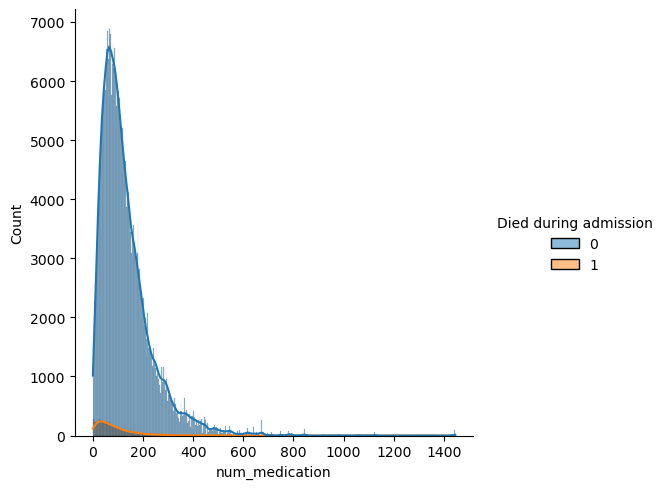

In [19]:
sns.displot(data=inpatient_subset, x='num_medication', hue = 'Died during admission', kde=True)

The Distribution of Number of medications is very skewed. We cannot understand the trend from here.

As the majority of the patinet have 0 orders each year.

We will look into deeply, We will drill down the data and look for data in detail.


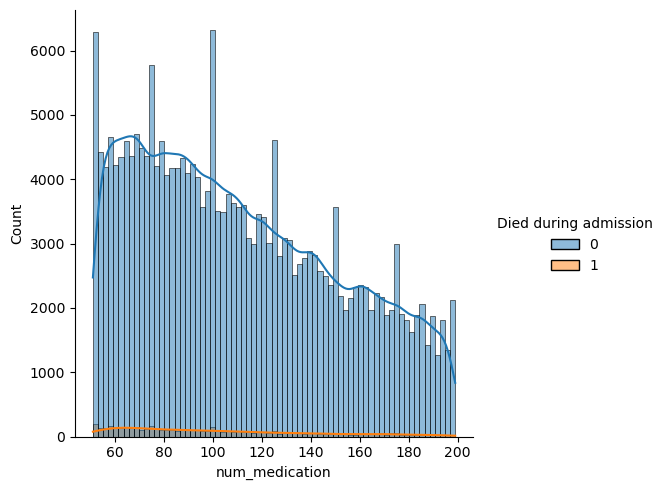

In [24]:
sns.displot(data=inpatient_subset.loc[(inpatient_subset['num_medication']>50) & (inpatient_subset['num_medication'] < 200)], x='num_medication', hue = 'Died during admission', kde=True)

Now, if we look at the data for number of medications less than equal to 80, the patients most likeyly to die and it will become the deciding criteria for the model.

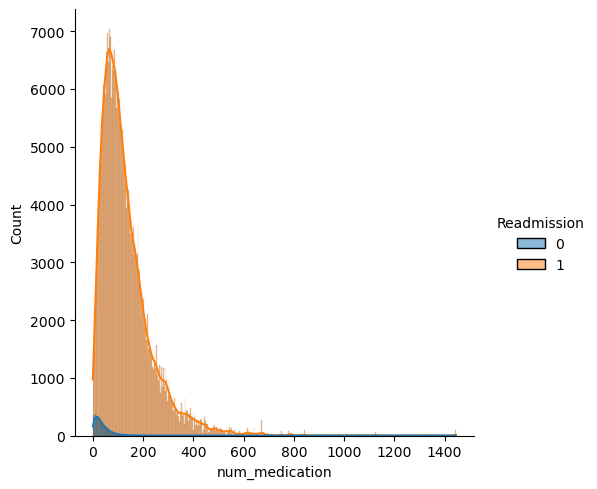

In [25]:
sns.displot(data=inpatient_subset, x='num_medication', hue = 'Readmission', kde=True)

The Distribution of Number of Medication is very skewed. We cannot understand the trend from here.

As the majority of the patinet have 0 orders each year.

We will look into deeply, We will drill down the data and look for data in detail.


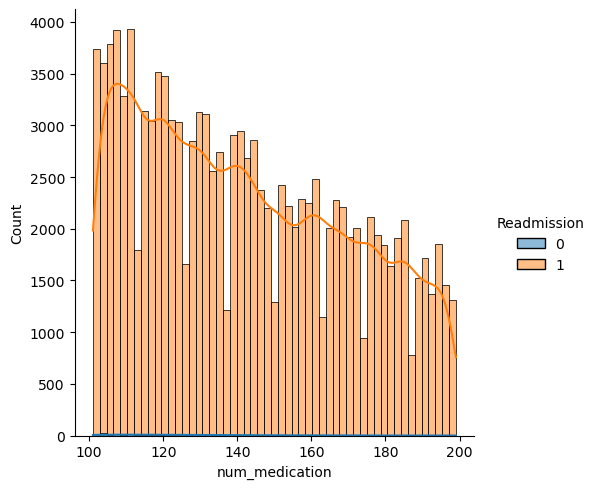

In [26]:
sns.displot(data=inpatient_subset.loc[(inpatient_subset['num_medication'] > 100) & (inpatient_subset['num_medication'] < 200)], x='num_medication', hue = 'Readmission', kde=True)

Now, if we look at the data for number of medications greater than equal to 110, the patients most likeyly to Readmit to the hospital and it will become the deciding criteria for the model.

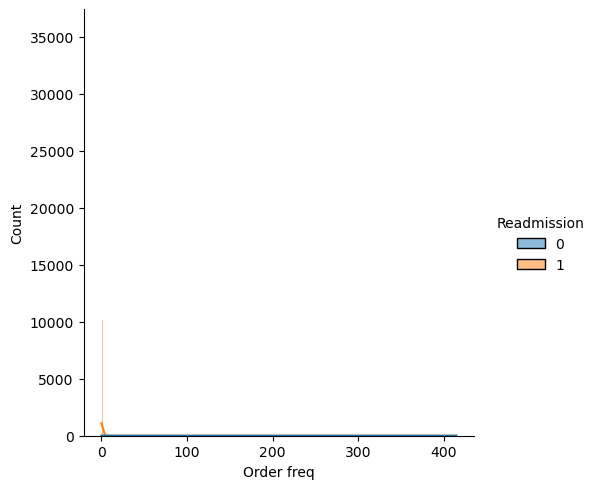

In [34]:
sns.displot(data=inpatient_subset, x='Order freq', hue = 'Readmission', kde=True)

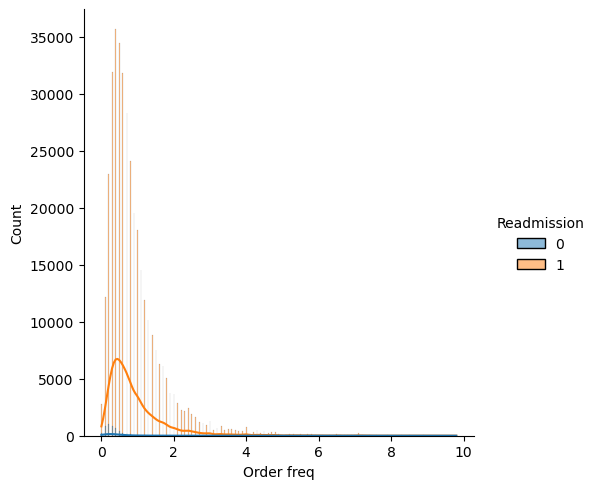

In [37]:
sns.displot(data=inpatient_subset.loc[inpatient_subset['Order freq']<10], x='Order freq', hue = 'Readmission', kde=True)

Monthly take medicine greater than once is more likely to readmit to the hospital

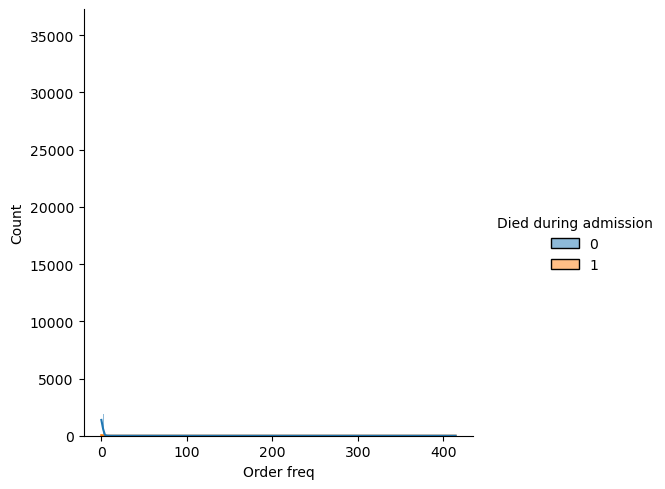

In [38]:
sns.displot(data=inpatient_subset, x='Order freq', hue = 'Died during admission', kde=True)

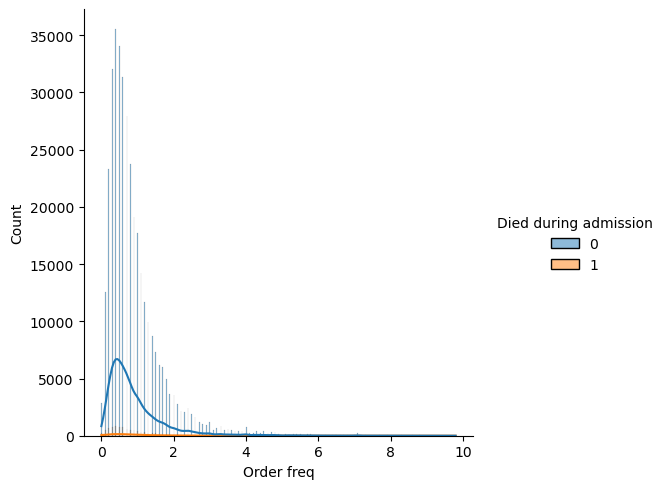

In [39]:
sns.displot(data=inpatient_subset.loc[inpatient_subset['Order freq']<10], x='Order freq', hue = 'Died during admission', kde=True)

Monthly take medicine greater than once is more likely to readmit to the hospital

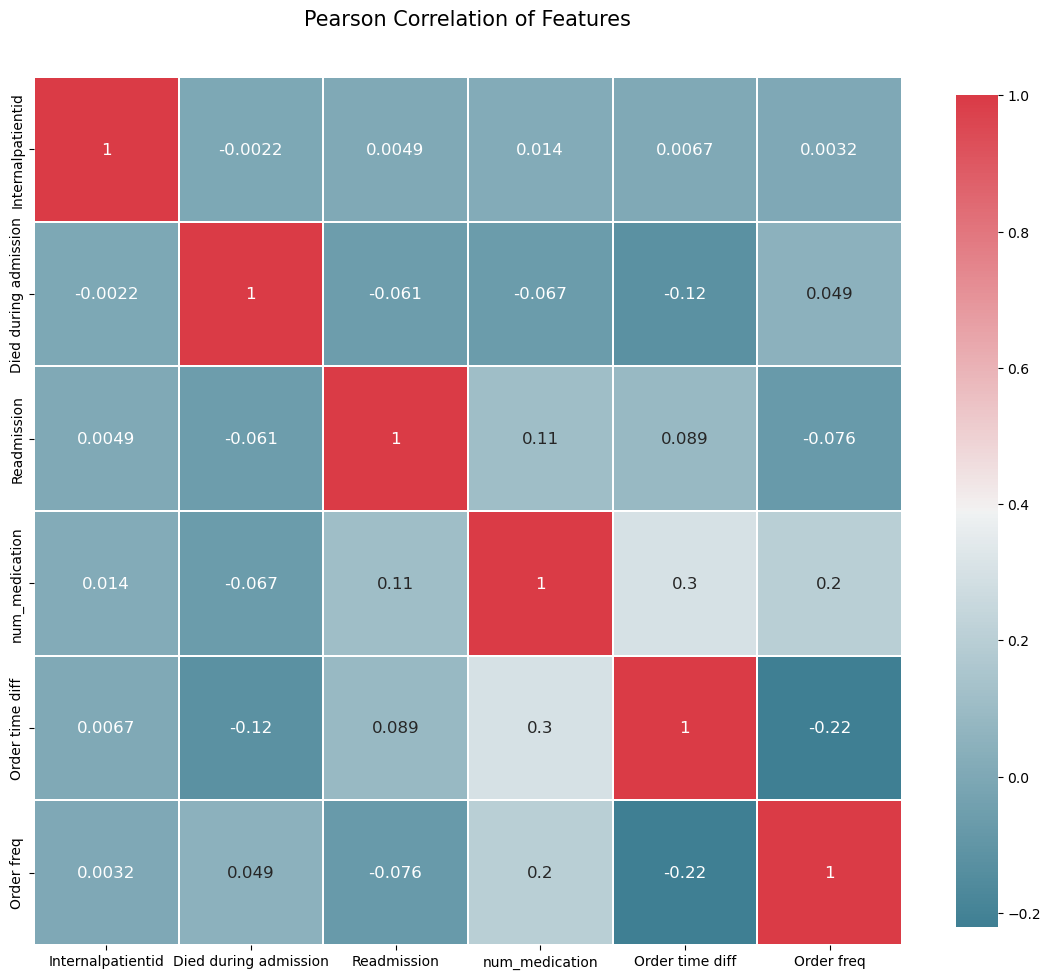

In [44]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

#correlation_heatmap(data[orig_cols+[target, target2]])
correlation_heatmap(inpatient_subset)

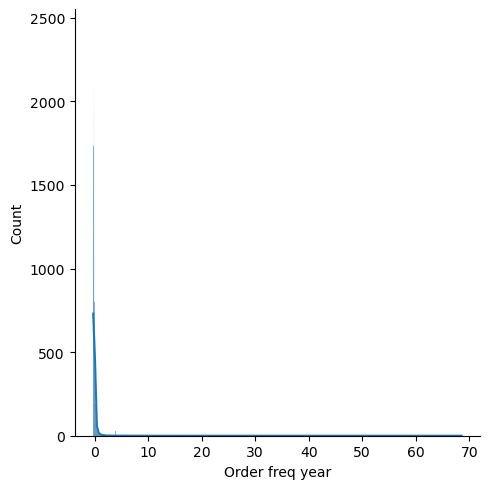

In [33]:
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
orders_scaled = orders.copy()
orders_scaled[['Order freq year','num_medication']] = scaler.fit_transform(orders_scaled[['Order freq year','num_medication']])
sns.displot(data=orders_scaled, x='Order freq year', kde=True)
'''

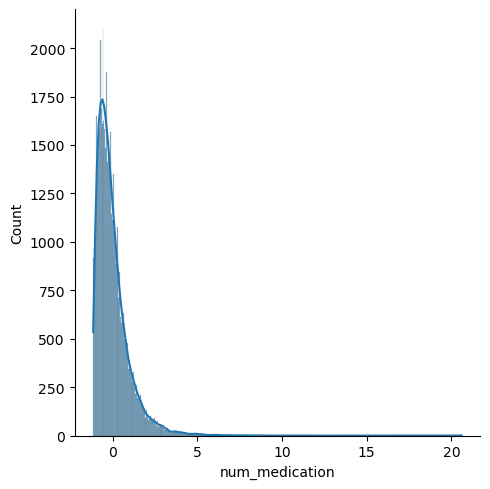

In [36]:
#sns.displot(data=orders_scaled, x='num_medication', kde=True)

In [12]:
'''
medications2 = medications.copy()
medications2 = medications2.merge(orders, how = 'inner', suffixes=(' ', ' '),
                                  on = 'Internalpatientid').sort_values(by = 'Internalpatientid')
medications2.drop(['medication_cnt', 'num_medication ',
       'num_medication ', 'Order time diff'], axis = 1, inplace = True)
'''